Task 1

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [16]:
from google.colab import files
uploaded = files.upload()

In [17]:
# Load dataset
dataset = pd.read_csv("/content/online_sales.csv")

# Display top 5 and random 5 samples
print("Top 5 rows:")
print(dataset.head())
print("\nRandom 5 rows:")
print(dataset.sample(5))

# Check the info of the dataframe
print("\nDataframe Info:")
print(dataset.info())

# Check for null values and drop rows with null values
d_null = dataset.isna().sum()
d_null = pd.DataFrame(d_null, columns=['NoOfNull'])
d_null['PercentNull'] = (d_null['NoOfNull'] / len(dataset)) * 100
print("\nNull Values:")
print(d_null)

dataset = dataset.dropna()

# Drop rows with negative Quantity values
dataset = dataset[dataset['Quantity'] > 0]

# Check the statistical summary of the dataset
print("\nStatistical Summary:")
print(dataset.describe())

Top 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  

Random 5 rows:
       InvoiceNo StockCode                          Description  Quantity  \
50343     540551     21650       ASSORTED TUTTI FRUTTI BRACELET         8   
110778    545696     21080  SET/20 RED RETR

In [18]:
# Check unique values of the country and the country with the highest number of instances
unique_values = dataset['Country'].unique()
print("\nUnique values of the country in the dataset:")
print(unique_values)

country_counts = dataset['Country'].value_counts()
print(f"\nCountry with the highest number of instances: {country_counts.idxmax()}")

# Create a new column 'sales' with total sales (Quantity * UnitPrice)
dataset['sales'] = dataset['Quantity'] * dataset['UnitPrice']
print("\nTop 5 rows with sales column:")
print(dataset.head())



Unique values of the country in the dataset:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta'
 'Unit']

Country with the highest number of instances: United Kingdom

Top 5 rows with sales column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    Inv

In [19]:
# Top 5 countries in terms of sales size
by_sales_size = dataset.groupby('Country')['sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 countries in terms of sales size:")
print(by_sales_size)

# Top 5 countries in terms of mean sales
by_sales_mean = dataset.groupby('Country')['sales'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 countries in terms of mean sales:")
print(by_sales_mean)

# Top 5 products bringing the highest sales
top_5_products = dataset.groupby('StockCode')['sales'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 products bringing the highest sales:")
print(top_5_products)

# Convert 'InvoiceDate' to datetime format and report the month with maximum sales
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['month'] = dataset['InvoiceDate'].dt.strftime("%B")

month_max = dataset.groupby('month')['sales'].sum().sort_values(ascending=False).idxmax()
print(f"\nThe month with the maximum sales is: {month_max}")




Top 5 countries in terms of sales size:
Country
United Kingdom    3167696.671
Netherlands        125816.110
Germany            106223.190
EIRE               101406.060
France              89349.880
Name: sales, dtype: float64

Top 5 countries in terms of mean sales:
Country
Australia      126.677444
Netherlands    110.461905
Japan          100.181609
Singapore       90.819912
Sweden          86.532205
Name: sales, dtype: float64

Top 5 products bringing the highest sales:
StockCode
22423     84734.20
23166     78499.90
85123A    58904.07
22502     47167.85
47566     40513.85
Name: sales, dtype: float64


<ipython-input-19-21685a6d0a9d>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])



The month with the maximum sales is: May



Correlation Matrix:
           Quantity  UnitPrice     sales      Year     Month       Day  \
Quantity   1.000000  -0.338171  0.401714  0.028283 -0.020584  0.021751   
UnitPrice -0.338171   1.000000  0.288325 -0.000518 -0.000950 -0.002908   
sales      0.401714   0.288325  1.000000  0.029625 -0.019782  0.021072   
Year       0.028283  -0.000518  0.029625  1.000000 -0.892367  0.252495   
Month     -0.020584  -0.000950 -0.019782 -0.892367  1.000000 -0.281448   
Day        0.021751  -0.002908  0.021072  0.252495 -0.281448  1.000000   
Hour      -0.093932  -0.008187 -0.161095 -0.048320  0.040627  0.002566   

               Hour  
Quantity  -0.093932  
UnitPrice -0.008187  
sales     -0.161095  
Year      -0.048320  
Month      0.040627  
Day        0.002566  
Hour       1.000000  


<ipython-input-20-44f93056695e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[features] = scaler.fit_transform(dataset[features])


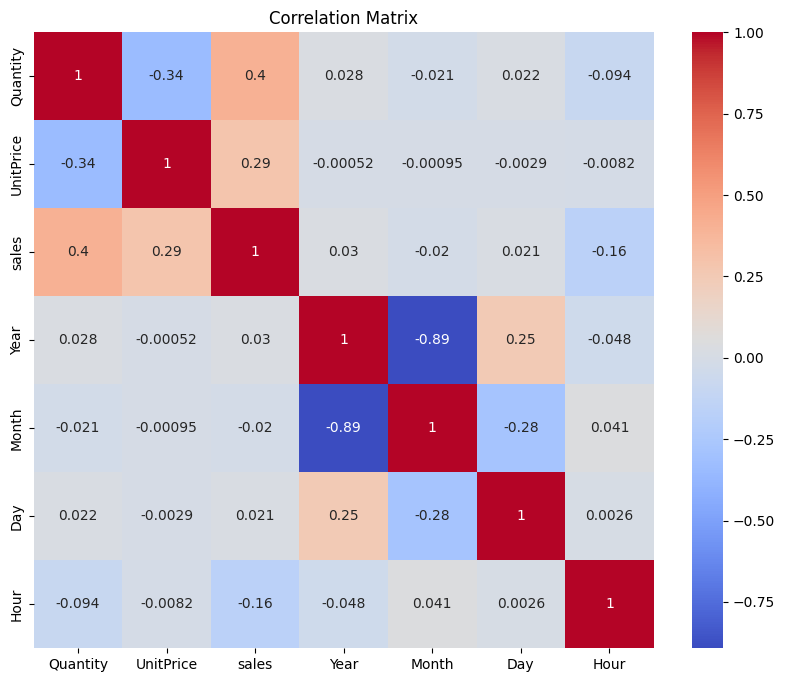

In [20]:
# Feature Engineering: Creating additional features
dataset['Year'] = dataset['InvoiceDate'].dt.year
dataset['Month'] = dataset['InvoiceDate'].dt.month
dataset['Day'] = dataset['InvoiceDate'].dt.day
dataset['Hour'] = dataset['InvoiceDate'].dt.hour

# Remove outliers based on sales
q1 = dataset['sales'].quantile(0.25)
q3 = dataset['sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
dataset = dataset[(dataset['sales'] >= lower_bound) & (dataset['sales'] <= upper_bound)]

# Standardize features
scaler = StandardScaler()
features = ['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour']
dataset[features] = scaler.fit_transform(dataset[features])

# Linear Algebra Techniques: Correlation Matrix
correlation_matrix = dataset[['Quantity', 'UnitPrice', 'sales', 'Year', 'Month', 'Day', 'Hour']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualization of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


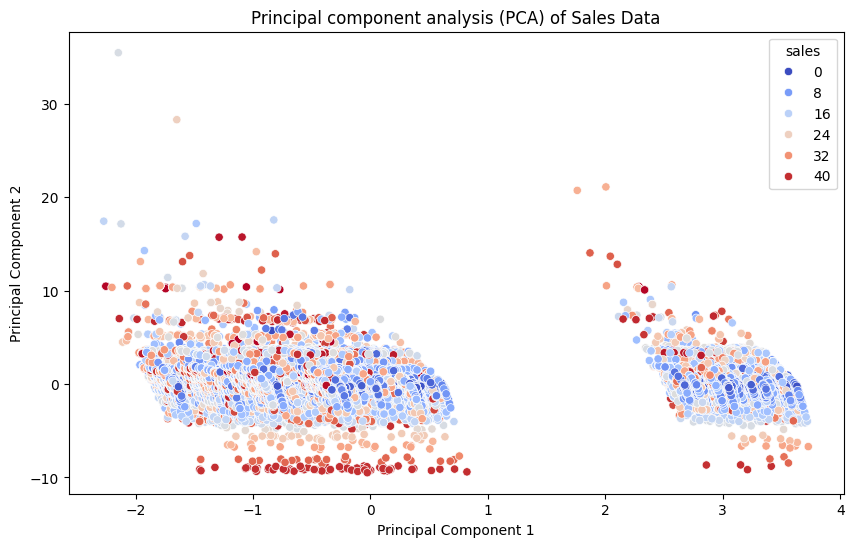

In [25]:
# Principal component analysis (PCA) for dimensionality reduction and trend analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset[features])
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['sales'] = dataset['sales'].values

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sales', data=pca_df, palette='coolwarm')
plt.title('Principal component analysis (PCA) of Sales Data')
plt.show()

In [22]:
# Preparing data for regression analysis
X = dataset[['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour']]
y = dataset['sales']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Applying Ridge Regression
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# Applying Lasso Regression
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# Applying Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [23]:
# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"\nLinear Regression - Mean Squared Error: {mse_lr}, R2 Score: {r2_lr}")

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"\nRidge Regression - Mean Squared Error: {mse_ridge}, R2 Score: {r2_ridge}")

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"\nLasso Regression - Mean Squared Error: {mse_lasso}, R2 Score: {r2_lasso}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"\nRandom Forest Regressor - Mean Squared Error: {mse_rf}, R2 Score: {r2_rf}")



Linear Regression - Mean Squared Error: 49.59989011058705, R2 Score: 0.38480410601867276

Ridge Regression - Mean Squared Error: 49.59990436950743, R2 Score: 0.3848039291628521

Lasso Regression - Mean Squared Error: 53.56104536701159, R2 Score: 0.3356732219836137

Random Forest Regressor - Mean Squared Error: 0.006052755654898198, R2 Score: 0.9999249266395981


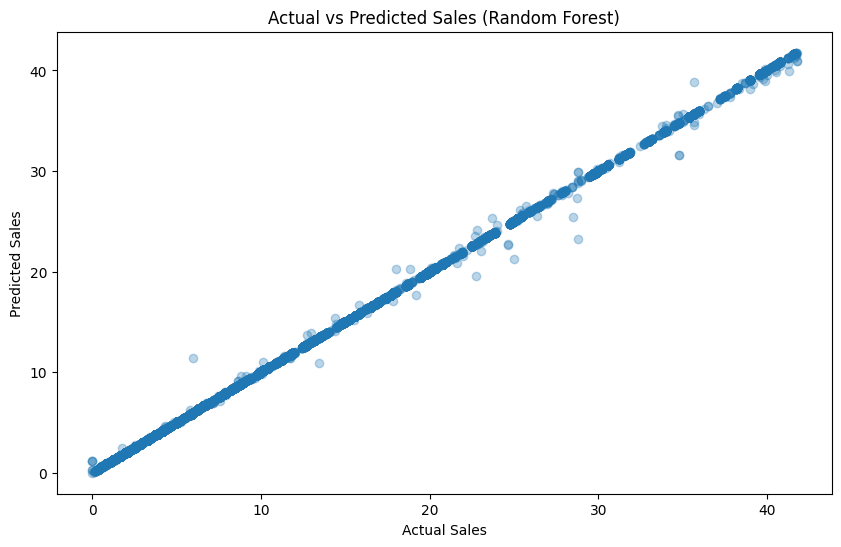

In [24]:
# Visualization of actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()
